In [9]:
!python -V

Python 3.11.5


In [10]:
import pandas as pd

In [11]:
import pickle

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [58]:
df = pd.read_parquet('./yellow_tripdata_2023-01.parquet')

df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)


# df.duration.describe()  #to see the std dev of the duration var

# ((df.duration >= 1) & (df.duration <= 60)).mean()  # to see the fraction

df = df[(df.duration >= 1) & (df.duration <= 60)]



categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
    
df[categorical] = df[categorical].astype(str)
# df # to see the column number

0.9812202822125979

fraction= 98%
standard dev is 42.9
the initial column number is 19


In [53]:
# train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts = df[categorical].to_dict(orient='records') # Only the categorical features for this model

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

# X_train #to see the dim of this matrix

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.649261959768939

the dim of the matrix is 515

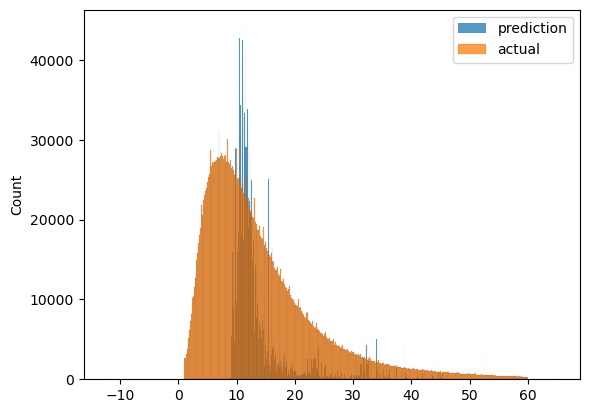

In [38]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')
# I use histplot cause displot doesnt work wih my version of jupyter notebook
plt.legend()

In [54]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [55]:
df_train = read_dataframe('./yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./yellow_tripdata_2023-02.parquet')

In [56]:
val_dicts = df_val[categorical].to_dict(orient='records') # Only the categorical features for this model

X_val = dv.transform(val_dicts)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.811816826653192

In [45]:
len(df_train), len(df_val)

(3009173, 2855951)

In [46]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [47]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

# train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts = df_train[categorical].to_dict(orient='records') # Only the categorical features for this model

X_train = dv.fit_transform(train_dicts)

# val_dicts = df_val[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical].to_dict(orient='records') # Only the categorical features for this model

X_val = dv.transform(val_dicts)

In [48]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.198559710982229

In [ ]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [ ]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)